# Indexing pandas time series


## Creating and using a DatetimeIndex

- Prepare a format string, time_format, using '%Y-%m-%d %H:%M' as the desired format.
- Convert date_list into a datetime object by using the pd.to_datetime() function. Specify the format string you defined above and assign the result to my_datetimes.
- Construct a pandas Series called time_series using pd.Series() with temperature_list and my_datetimes. Set the index of the Series to be my_datetimes.

In [ ]:
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)

## Partial string indexing and slicing


- Extract data from ts0 for a single hour - the hour from 9pm to 10pm on 2010-10-11. Assign it to ts1.
- Extract data from ts0 for a single day - July 4th, 2010 - and assign it to ts2.
- Extract data from ts0 for the second half of December 2010 - 12/15/2010 to 12/31/2010. Assign it to ts3.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
ts0 = pd.read_csv('ts0.csv', index_col=0, parse_dates=True)

ts0.head()

,46.2
2010-01-01 00:00:00,
2010-01-01 01:00:00,44.6
2010-01-01 02:00:00,44.1
2010-01-01 03:00:00,43.8
2010-01-01 04:00:00,43.5
2010-01-01 05:00:00,43.0


In [10]:
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15' : '2010-12-31']

In [16]:
ts1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2 entries, 2010-10-11 21:00:00 to 2010-10-11 22:00:00
Data columns (total 1 columns):
46.2    2 non-null float64
dtypes: float64(1)
memory usage: 32.0 bytes


In [14]:
ts2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2010-07-04 00:00:00 to 2010-07-04 23:00:00
Data columns (total 1 columns):
46.2    24 non-null float64
dtypes: float64(1)
memory usage: 384.0 bytes


In [15]:
ts3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 2010-12-15 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
46.2    408 non-null float64
dtypes: float64(1)
memory usage: 6.4 KB


## Reindexing the Index
 

Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with NaN by default.

In this exercise, two time series data sets containing daily data have been pre-loaded for you, each indexed by dates. The first, ts1, includes weekends, but the second, ts2, does not. The goal is to combine the two data sets in a sensible way. Your job is to reindex the second data set so that it has weekends as well, and then add it to the first. When you are done, it would be informative to inspect your results.

- Create a new time series ts3 by reindexing ts2 with the index of ts1. To do this, call .reindex() on ts2 and pass in the index of ts1 (ts1.index).
- Create another new time series, ts4, by calling the same .reindex() as above, but also specifiying a fill method, using the keyword argument method="ffill" to forward-fill values.
- Add ts1 + ts2. Assign the result to sum12.
- Add ts1 + ts3. Assign the result to sum13.
- Add ts1 + ts4, Assign the result to sum14.

In [19]:
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)

# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method="ffill")

# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2

# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3

# Combine ts1 + ts4: sum14
sum14 = ts1 + ts4

In [27]:
print('ts3:', ts3,'\n')
print('ts4:', ts4,'\n')
print('sum12', sum12,'\n')
print('sum13', sum13,'\n')
print('sum14', sum14,'\n')

ts3:                      46.2
2010-01-01 00:00:00      
2010-10-11 21:00:00   NaN
2010-10-11 22:00:00   NaN 

ts4:                      46.2
2010-01-01 00:00:00      
2010-10-11 21:00:00  78.5
2010-10-11 22:00:00  78.5 

sum12                      46.2
2010-01-01 00:00:00      
2010-07-04 00:00:00   NaN
2010-07-04 01:00:00   NaN
2010-07-04 02:00:00   NaN
2010-07-04 03:00:00   NaN
2010-07-04 04:00:00   NaN
2010-07-04 05:00:00   NaN
2010-07-04 06:00:00   NaN
2010-07-04 07:00:00   NaN
2010-07-04 08:00:00   NaN
2010-07-04 09:00:00   NaN
2010-07-04 10:00:00   NaN
2010-07-04 11:00:00   NaN
2010-07-04 12:00:00   NaN
2010-07-04 13:00:00   NaN
2010-07-04 14:00:00   NaN
2010-07-04 15:00:00   NaN
2010-07-04 16:00:00   NaN
2010-07-04 17:00:00   NaN
2010-07-04 18:00:00   NaN
2010-07-04 19:00:00   NaN
2010-07-04 20:00:00   NaN
2010-07-04 21:00:00   NaN
2010-07-04 22:00:00   NaN
2010-07-04 23:00:00   NaN
2010-10-11 21:00:00   NaN
2010-10-11 22:00:00   NaN 

sum13                      46.2
2010-01-01

# Resampling pandas time series


## Resampling and frequency


Pandas provides methods for resampling time series data. When downsampling or upsampling, the syntax is similar, but the methods called are different. Both use the concept of 'method chaining' - df.method1().method2().method3() - to direct the output from one method call to the input of the next, and so on, as a sequence of operations, one feeding into the next.

For example, if you have hourly data, and just need daily data, pandas will not guess how to throw out the 23 of 24 points. You must specify this in the method. One approach, for instance, could be to take the mean, as in df.resample('D').mean().

In this exercise, a data set containing hourly temperature data has been pre-loaded for you. Your job is to resample the data using a variety of aggregation methods to answer a few questions.

- Downsample the 'Temperature' column of df to 6 hour data using .resample('6h') and .mean(). Assign the result to df1.
- Downsample the 'Temperature' column of df to daily data using .resample('D') and then count the number of data points in each day with .count(). Assign the result df2.

In [34]:
df = pd.read_csv('hourly_temperature.csv', index_col=0, parse_dates=True)

df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [36]:
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('6h').mean()

# Downsample to daily data and count the number of data points: df2
df2 = df['Temperature'].resample('D').count()

In [37]:
df1.head()

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

In [38]:
df2.head()

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

## Separating and resampling


With pandas, you can resample in different ways on different subsets of your data. For example, resampling different months of data with different aggregations. In this exercise, the data set containing hourly temperature data from the last exercise has been pre-loaded.

Your job is to resample the data using a variety of aggregation methods. The DataFrame is available in the workspace as df. You will be working with the 'Temperature' column.

- Use partial string indexing to extract temperature data for August 2010 into august.
- Use the temperature data for August and downsample to find the daily maximum temperatures. Store the result in august_highs.
- Use partial string indexing to extract temperature data for February 2010 into february.
- Use the temperature data for February and downsample to find the daily minimum temperatures. Store the result in february_lows.

In [52]:
# Extract temperature data for August: august
august = df['Temperature'].loc['2010-08']

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

# Extract temperature data for February: february
february = df['Temperature'].loc['2010-02']

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()

In [54]:
print(august_highs)
print(february_lows)

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
2010-08-06    95.2
2010-08-07    95.3
2010-08-08    95.2
2010-08-09    95.2
2010-08-10    95.1
2010-08-11    95.0
2010-08-12    94.9
2010-08-13    95.0
2010-08-14    94.9
2010-08-15    94.7
2010-08-16    94.7
2010-08-17    94.8
2010-08-18    94.8
2010-08-19    94.8
2010-08-20    94.8
2010-08-21    94.7
2010-08-22    94.6
2010-08-23    94.5
2010-08-24    94.3
2010-08-25    94.1
2010-08-26    94.0
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64
Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
2010-02-06    44.1
2010-02-07    44.3
2010-02-08    44.7
2010-02-09    44.7
2010-02-10    44.9
2010-02-11    45.2
2010-02-12    45.5
2010-02-13    46.0
2010-02-14    46.6
2010-02-15    46.9
2010-02-16    47.1
2010-02-17    47.2
2010-02-18    47.2
2010-02-19    47

## Rolling mean and frequency

In this exercise, some hourly weather data is pre-loaded for you. You will continue to practice resampling, this time using rolling means.

Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends. You can read more about them here.

To use the .rolling() method, you must always use method chaining, first calling .rolling() and then chaining an aggregation method after it. For example, with a Series hourly_data, hourly_data.rolling(window=24).mean() would compute new values for each hourly point, based on a 24-hour window stretching out behind each point. The frequency of the output data is the same: it is still hourly. Such an operation is useful for smoothing time series data.

Your job is to resample the data using the combination of .rolling() and .mean(). You will work with the same DataFrame df from the previous exercise.

- Use partial string indexing to extract temperature data from August 1 2010 to August 15 2010. Assign to unsmoothed.
- Use .rolling() with a 24 hour window to smooth the mean temperature data. Assign the result to smoothed.
- Use a dictionary to create a new DataFrame august with the time series smoothed and unsmoothed as columns.
- Plot both the columns of august as line plots using the .plot() method.


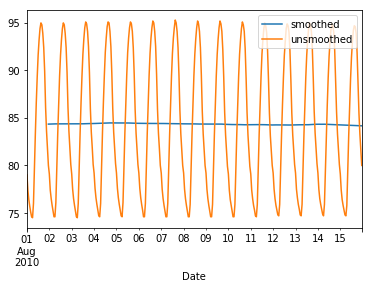

In [69]:
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-08-01':'2010-08-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

## Resample and roll with it

As of pandas version 0.18.0, the interface for applying rolling transformations to time series has become more consistent and flexible, and feels somewhat like a groupby (If you do not know what a groupby is, don't worry, you will learn about it in the next course!).

You can now flexibly chain together resampling and rolling operations. In this exercise, the same weather data from the previous exercises has been pre-loaded for you. Your job is to extract one month of data, resample to find the daily high temperatures, and then use a rolling and aggregation operation to smooth the data.



- Use partial string indexing to extract August 2010 temperature data, and assign to august.
- Resample to daily frequency, saving the maximum daily temperatures, and assign the result to daily_highs.
- As part of one long method chain, repeat the above resampling (or you can re-use daily_highs) and then combine it with .rolling() to apply a 7 day .mean() (with window=7 inside .rolling()) so as to smooth the daily highs. Assign the result to daily_highs_smoothed and print the result.

In [72]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-08']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = august.resample('D').max().rolling(window=7).mean()
print(daily_highs_smoothed)

Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64


# Manipulating pandas time series

## Method chaining and filtering
 

We've seen that pandas supports method chaining. This technique can be very powerful when cleaning and filtering data.

In this exercise, a DataFrame containing flight departure data for a single airline and a single airport for the month of July 2015 has been pre-loaded. Your job is to use .str() filtering and method chaining to generate summary statistics on flight delays each day to Dallas.


- Use .str.strip() to strip extra whitespace from df.columns. Assign the result back to df.columns.
- In the 'Destination Airport' column, extract all entries where Dallas ('DAL') is the destination airport. Use .str.contains('DAL') for this and store the result in dallas.
- Resample dallas such that you get the total number of departures each day. Store the result in daily_departures.
- Generate summary statistics for daily Dallas departures using .describe(). Store the result in stats.

In [75]:
df = pd.read_csv('flight_data.csv', index_col=0, parse_dates=True)
df.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,,
2015-07-01,WN,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0,NaN


In [85]:
# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip()

# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()

## Missing values and interpolation

One common application of interpolation in data analysis is to fill in missing data.

In this exercise, noisy measured data that has some dropped or otherwise missing values has been loaded. The goal is to compare two time series, and then look at summary statistics of the differences. The problem is that one of the data sets is missing data at some of the times. The pre-loaded data ts1 has value for all times, yet the data set ts2 does not: it is missing data for the weekends.

Your job is to first interpolate to fill in the data for all days. Then, compute the differences between the two data sets, now that they both have full support for all times. Finally, generate the summary statistics that describe the distribution of differences.

- Replace the index of ts2 with that of ts1, and then fill in the missing values of ts2 by using .interpolate(how='linear'). Save the result as ts2_interp.
- Compute the difference between ts1 and ts2_interp. Take the absolute value of the difference with np.abs(), and assign the result to differences.
- Generate and print summary statistics of the differences with .describe() and print().

In [97]:
import numpy as np

ts1 = pd.read_csv('ts1.csv', index_col=0, parse_dates=True)
ts2 = pd.read_csv('ts2.csv', index_col=0, parse_dates=True)

In [108]:
# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate('linear')

# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts2_interp - ts1)

# Generate and print summary statistics of the differences
print(differences.describe())

               0
count  14.000000
mean    3.357143
std     1.284119
min     2.000000
25%     2.000000
50%     3.666667
75%     4.000000
max     6.000000


## Time zones and conversion


Time zone handling with pandas typically assumes that you are handling the Index of the Series. In this exercise, you will learn how to handle timezones that are associated with datetimes in the column data, and not just the Index.

You will work with the flight departure dataset again, and this time you will select Los Angeles ('LAX') as the destination airport.

Here we will use a mask to ensure that we only compute on data we actually want. To learn more about Boolean masks, click here!

- Create a Boolean mask, mask, such that if the 'Destination Airport' column of df equals 'LAX', the result is True, and otherwise, it is False.
- Use the mask to extract only the LAX rows. Assign the result to la.
- Concatenate the two columns la['Date (MM/DD/YYYY)'] and la['Wheels-off Time'] with a ' ' space in between. Pass this to pd.to_datetime() to create a datetime array of all the times the LAX-bound flights left the ground.
- Use Series.dt.tz_localize() to localize the time to 'US/Central'.
- Use the .dt.tz_convert() method to convert datetimes from 'US/Central' to 'US/Pacific'.


In [147]:
df = pd.read_csv('flight_data.csv', parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 18 columns):
Date (MM/DD/YYYY)                         1740 non-null object
  Carrier Code                            1741 non-null object
Flight Number                             1740 non-null float64
Tail Number                               1740 non-null object
Destination Airport                       1740 non-null object
Scheduled Departure Time                  1740 non-null object
Actual Departure Time                     1740 non-null object
Scheduled Elapsed Time(Minutes)           1740 non-null float64
Actual Elapsed Time(Minutes)              1740 non-null float64
Departure Delay(Minutes)                  1740 non-null float64
Wheels-off Time                           1740 non-null object
Taxi-out Time(Minutes)                    1740 non-null float64
DelayCarrier(Minutes)                     1740 non-null float64
DelayWeather(Minutes)                     1740 non-null float64
Dela

In [148]:
# Build a Boolean mask to filter out all the 'LAX' departure flights: mask
mask = df['Destination Airport'] == 'LAX'

# Use the mask to subset the data: la
la = df[mask]

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime(la['Date (MM/DD/YYYY)'] + ' ' + la['Wheels-off Time'])

# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')

# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')

In [149]:
times_tz_pacific.head()

33    2015-07-01 03:43:00-07:00
55    2015-07-01 14:27:00-07:00
91    2015-07-02 03:47:00-07:00
113   2015-07-02 14:23:00-07:00
134   2015-07-03 03:30:00-07:00
dtype: datetime64[ns, US/Pacific]

# Visualizing pandas time series


## Plotting time series, datetime indexing

Pandas handles datetimes not only in your data, but also in your plotting.

In this exercise, some time series data has been pre-loaded. However, we have not parsed the date-like columns nor set the index, as we have done for you in the past!

The plot displayed is how pandas renders data with the default integer/positional index. Your job is to convert the 'Date' column from a collection of strings into a collection of datetime objects. Then, you will use this converted 'Date' column as your new index, and re-plot the data, noting the improved datetime awareness. After you are done, you can cycle between the two plots you generated by clicking on the 'Previous Plot' and 'Next Plot' buttons.

Before proceeding, look at the plot shown and observe how pandas handles data with the default integer index. Then, inspect the DataFrame df using the .head() method in the IPython Shell to get a feel for its structure.



- Use pd.to_datetime() to convert the 'Date' column to a collection of datetime objects, and assign back to df.Date.
- Set the index to this updated 'Date' column, using df.set_index() with the optional keyword argument inplace=True, so that you don't have to assign the result back to df.
- Re-plot the DataFrame to see that the axis is now datetime aware. This code has been written for you.

In [156]:
df = pd.read_csv('temp_plot.csv', usecols=[1,2])

df.head()

,Temperature,Date
0,46.2,20100101 00:00
1,44.6,20100101 01:00
2,44.1,20100101 02:00
3,43.8,20100101 03:00
4,43.5,20100101 04:00


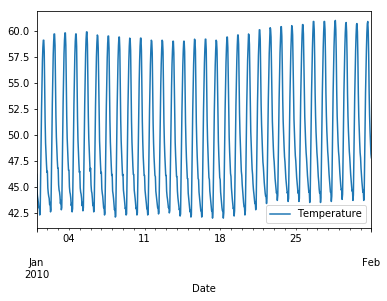

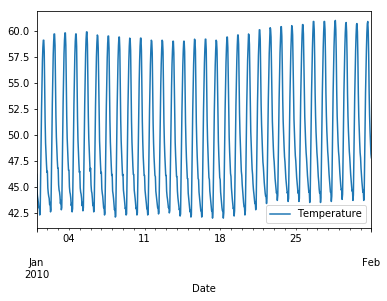

In [164]:
# Plot the raw data before setting the datetime index
df.plot()
plt.show()

# Convert the 'Date' column into a collection of datetime objects: df.Date
df.Date = pd.to_datetime(df.Date)

# Set the index to be the converted 'Date' column
df.set_index('Date', inplace=True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df.plot()
plt.show()

## Plotting date ranges, partial indexing

Now that you have set the DatetimeIndex in your DataFrame, you have a much more powerful and flexible set of tools to use when plotting your time series data. Of these, one of the most convenient is partial string indexing and slicing. In this exercise, we've pre-loaded a full year of Austin 2010 weather data, with the index set to be the datetime parsed 'Date' column as shown in the previous exercise.

Your job is to use partial string indexing of the dates, in a variety of datetime string formats, to plot all the summer data and just one week of data together. After you are done, you can cycle between the two plots by clicking on the 'Previous Plot' and 'Next Plot' buttons.

First, remind yourself how to extract one month of temperature data using 'May 2010' as a key into df.Temperature[], and call head() to inspect the result: df.Temperature['May 2010'].head().



- Plot the summer temperatures using method chaining. The summer ranges from the months '2010-Jun' to '2010-Aug'.
- Plot the temperatures for one week in June using the same method chaining, but this time indexing with '2010-06-10':'2010-06-17' before you follow up with .plot().

In [168]:
df = pd.read_csv('temp_austin.csv', index_col=0, parse_dates=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


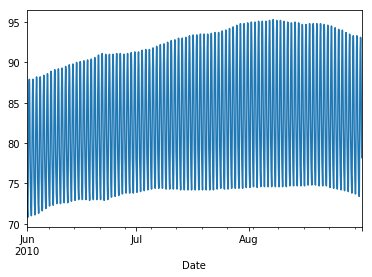

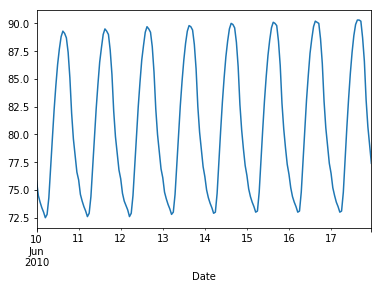

In [171]:
# Plot the summer data
df.Temperature['2010-June':'2010-August'].plot()
plt.show()
plt.clf()

# Plot the one week data
df.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()